# P1: Test a Perceptual Phenomenon

In this problem set, we investigate the Stroop effect by examining the reaction times of individuals tasked with verbally identifying the color of words whose meanings conflict with their text color (see "Background Information" section of the prompt). 

Before beginning any analysis, it is important that we answer a few questions:

#### 1. What are the independent/dependent variables?

The *independent* variables are congruent and incongruent words. By the way, we say that a word is *incongruent* if its meaning and text color are in conflict. The reverse is true for *congruent*.

The *dependent* variables are the reaction times&mdash;in this experiment, a measurement of the total amount of time taken to read a sequence of words.

#### 2. What set of hypotheses and statistical tests should we employ in order to achieve our research objective?
The main research objective is to investigate whether there exists a difference in effect on reaction time between reading congruent and incongruent words. In particular, we will test whether the mean reaction times for reading incongruent words is significantly greater than those for congruent, i.e. 
$$ H_0: \mu_D \leq 0\text{ vs }H_1: \mu_D > 0, $$
where $\mu_D = \mu_{incongruent} - \mu_{congruent} $ is the difference in the incongruent and congruent population reaction time means.

Note that this is a within-subject experimental design: each row corresponds to a single participant, so the congruent and incongruent samples must be dependent. Thus we will use a paired t-test.

## Analysis

In [1]:
my_congruent = 8.958
my_incongruent = 24.649

Above are my results. I don't include them in the analysis, since that would nullify the randomness of the simple random sample, but it is from these results that I decided to do a one-sided t-test.

In [2]:
import pandas as pd

data_dir = '...\\' 

data = pd.read_csv(data_dir + 'stroopdata.csv')

### Checking the paired t-test's assumptions
#### Normality
One assumption is that the two groups come from a population with a normal distribution. Let's make sure that it holds.

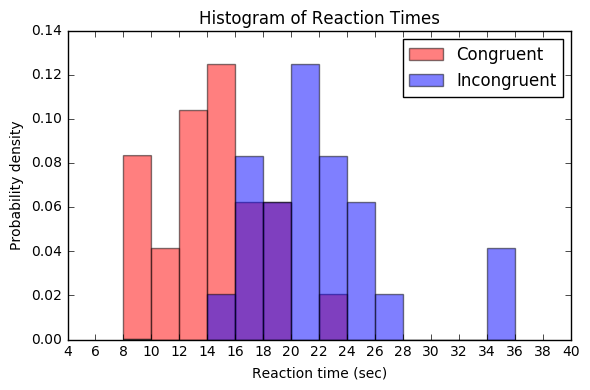

In [3]:
%matplotlib inline

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

con = data['Congruent']
incon = data['Incongruent']

mean_con, mean_incon = con.mean(), incon.mean()
std_con, std_incon = con.std(), incon.std()

fig, ax = plt.subplots()

rang = (int(data.min().min()), int(data.max().max())+1)
bins = int((rang[1] - rang[0]) / 2)

bins_con = ax.hist(con, range=rang, bins=bins, alpha=0.5, normed=True, color='red')[1]
bins_incon = ax.hist(incon, range=rang, bins=bins, alpha=0.5, normed=True, color='blue')[1]

ax.set_xlabel('Reaction time (sec)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Reaction Times')
ax.set_xticks(range(4, 42, 2))

fig.tight_layout()
plt.legend(loc='upper right')
plt.show()

Neither of the two histograms screams normally distributed, but they also do not scream the opposite.

It's worth making note of the potential outlier lying in the 30s region. Why? T-tests are not particularly robust against outliers, so it may have a negative impact on the test's performance. That, together with the group's relatively small sample size, advocate for further investigation. So let's do it.

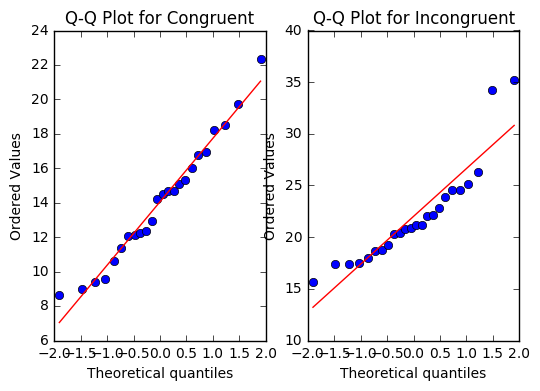

In [4]:
from scipy.stats import probplot

plt.subplot(1, 2, 1)
probplot(con, dist='norm', plot=plt)
plt.title('Q-Q Plot for Congruent')

plt.subplot(1, 2, 2)
probplot(incon, dist='norm', plot=plt)
plt.title('Q-Q Plot for Incongruent')

plt.show()

The congruent data appears pretty normal; however, the same cannot be said for the incongruent data. A normality test, such as the Shapiro-Wilk, may be useful.

In [5]:
from scipy.stats import shapiro

print('Congruent: ' + str(round(shapiro(con)[1], 2)))
print('Incongruent: ' + str(round(shapiro(incon)[1], 3)))

Congruent: 0.69
Incongruent: 0.003


The hypotheses set of Shapiro-Wilk test can be informally stated thus: 

\begin{align}
H_0&:\text{sample comes from a population with a normal distribution} \\
H_1&:\text{sample does not come from a population with a normal distribution}
\end{align}

So, at significance level $\alpha = 0.05$, incongruent having a p-value of 0.003 means...yikes! An assumption appears to be violated! But let's not dwell on this violation. Since this investigation went beyond the scope of the course, we'll just pretend like both groups come from a normally distributed population...

### Descriptive statistics

In [6]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Two things immediately grabbed my attention:
1. The spread of the groups (the standard deviation) is much larger than I expected. It's just an observation&mdash;nothing to worry about.
2. There appears to be a substantial difference in the mean of the two groups. For good measure, we will supply it with a more substantive justification.

### Hypothesis testing

Recall that our objective is to test 
$$ H_0: \mu_D = 0\text{ vs }H_1: \mu_D \neq 0 $$

and that, since the congruent and incongruent samples are dependent, we will use a paired t-test.

So let's gather all of the necessary components for this test.

In [7]:
diff_series = pd.Series(data['Incongruent'] - data['Congruent'], name='Difference')

diff_series.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

Under the null hypothesis, $$ T = \frac{\bar{x}_D - 0}{\frac{s_D}{\sqrt{n}}} \sim t(n-1) $$

Our critical value at significance level $\alpha = 0.05$ is $t^{*}_{0.05}(24-1) = 1.714$

So, $$T = \frac{7.964792 - 0}{\frac{4.864827}{\sqrt{24}}} \approx 8.02 >> 1.714 $$

Clearly, we reject the null hypothesis in favor of the alternative: $T = 8.02$ is *much* larger than $t^{*}_{0.05}(23) = 1.714$; or alternatively, our p-value 0.00000002 is *much* less than 0.05. In other words, we can say that there is significant evidence to suggest that the mean reaction times for reading incongruent words is greater than those for congruent.

## Discussion

Our conclusion isn't surprising&mdash;my attempt to perform the experimental task left me with a strong expectation toward the test's conclusion and is what persuaded me to choose a one-sided t-test. 

But remember: we shouldn't forget about the discovery in verifying the test's assumptions.

## Addendum: A Quick Note on Citations

As an undergraduate, I took quite a few courses in, as well as tutored, statistics. It's for these reasons that there aren't any citations in this document.